In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn import metrics
import tensorflow as tf

In [2]:
print(tf.test.gpu_device_name())

In [3]:
dataset_df = pd.read_csv('Churn_Modelling.csv')
dataset_df = dataset_df.dropna()
dataset_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
customer_df = dataset_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [7]:
customer_df = customer_df.replace('Male', 1)
customer_df = customer_df.replace('Female', 0)

In [8]:
customer_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
CreditScore_churn = customer_df[customer_df['Exited'] == 1].CreditScore
CreditScore_no_churn = customer_df[customer_df['Exited'] == 0].CreditScore

Balance_churn = customer_df[customer_df['Exited'] == 1].Balance
Balance_no_churn = customer_df[customer_df['Exited'] == 0].Balance

EstimatedSalary_churn = customer_df[customer_df['Exited'] == 1].EstimatedSalary
EstimatedSalary_no_churn = customer_df[customer_df['Exited'] == 0].EstimatedSalary

Tenure_churn = customer_df[customer_df['Exited'] == 1].Tenure
Tenure_no_churn = customer_df[customer_df['Exited'] == 0].Tenure

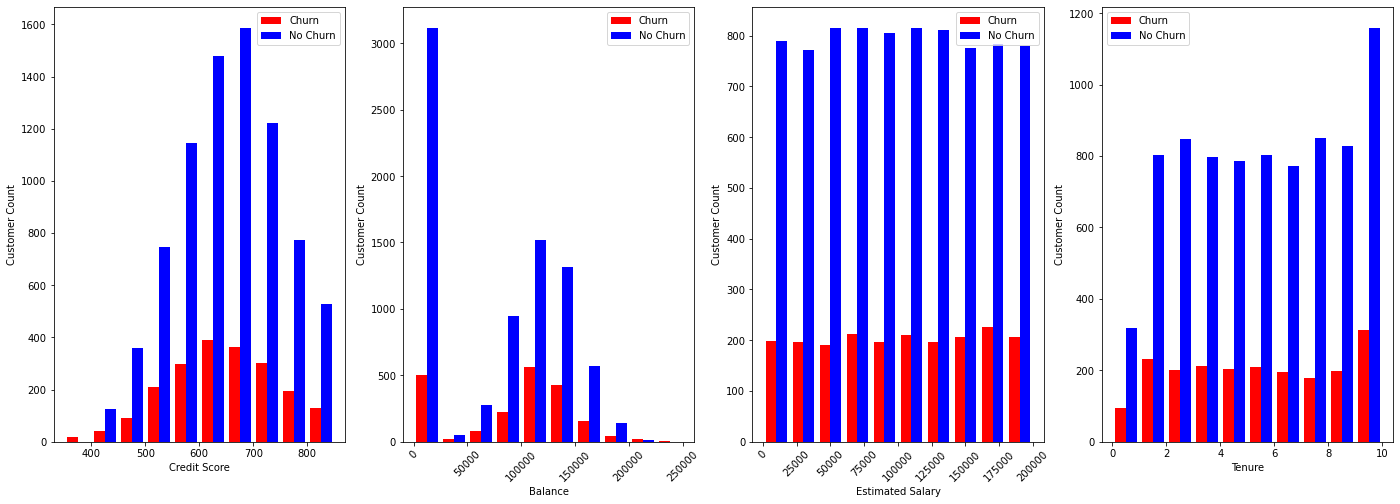

In [10]:
plt.figure(figsize=(24,8))
plt.subplot(1, 4, 1)
plt.hist([CreditScore_churn, CreditScore_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xlabel('Credit Score')
plt.ylabel('Customer Count')
plt.legend()

plt.subplot(1, 4, 2)
plt.hist([Balance_churn, Balance_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xticks(rotation=45)
plt.xlabel('Balance')
plt.ylabel('Customer Count')
plt.legend()

plt.subplot(1, 4, 3)
plt.hist([EstimatedSalary_churn, EstimatedSalary_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xticks(rotation=45)
plt.xlabel('Estimated Salary')
plt.ylabel('Customer Count')
plt.legend()

plt.subplot(1, 4, 4)
plt.hist([Tenure_churn, Tenure_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.legend()

plt.show()

In [11]:
customer_df = pd.get_dummies(customer_df, columns=['Geography'])

In [12]:
customer_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [13]:
scaler = MinMaxScaler()
customer_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(customer_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [14]:
customer_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,2,1,0,0.464429,1,0,1,0


In [15]:
x = customer_df.drop(columns=['Exited'])
y = customer_df['Exited']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
model = Sequential()
model.add(Dense(64, input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
203/250 [=======================>......] - ETA: 0s - loss: 0.5328 - accuracy: 0.7717WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000028BD14EA948> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [20]:
predictions = model.predict(x_test)

predictions_binary = []
for pred in predictions:
    if pred >= 0.6:
        predictions_binary.append(1)
    else:
        predictions_binary.append(0)
        
print(metrics.confusion_matrix(y_test, predictions_binary))
print(metrics.classification_report(y_test, predictions_binary))
print(metrics.accuracy_score(y_test, predictions_binary))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1568   39]
 [ 238  155]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.80      0.39      0.53       393

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

0.8615


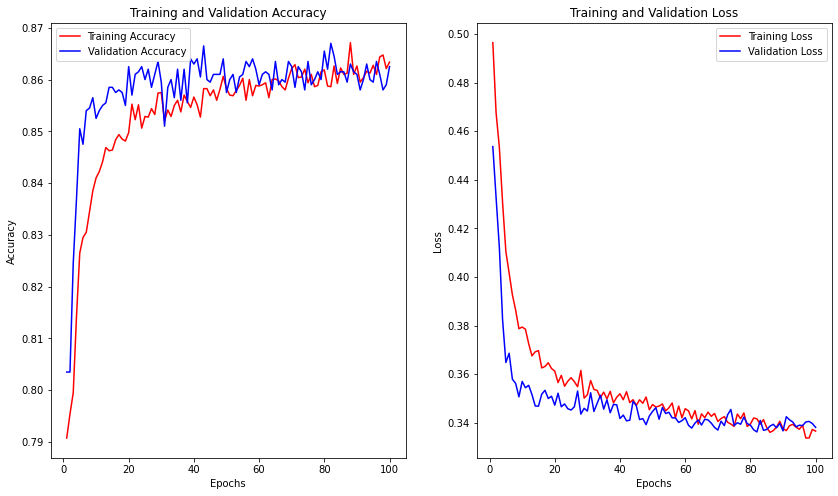

In [21]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,101)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train,'r',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,loss_train,'r',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()